# Laboratorio 3 - Parte 1

### Modelos de mezclas de funciones Gausianas y k-means

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [ ]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html


#### Primer integrante: Jhon David Gonzalez 1017204873
#### Segundo integrante: Mateo Llano 1045025062

In [6]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
##from __future__ import division
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [7]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target

Un vistazo a la base de datos

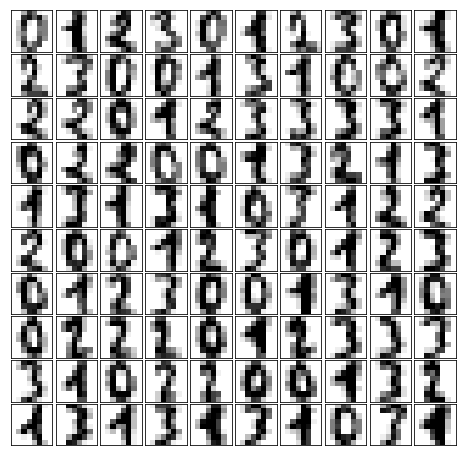

In [8]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

Responda:

1.1 ¿Cuántas muestras por clase tiene la base de datos?:

In [9]:
clases, cantidad = np.unique(Y, return_counts=True)
for i in range(np.size(clases)):
    print("El número de muestras de la clase " + str(clases[i]) + " es de " + str(cantidad[i]))

El número de muestras de la clase 0 es de 178
El número de muestras de la clase 1 es de 182
El número de muestras de la clase 2 es de 177
El número de muestras de la clase 3 es de 183


1.2 ¿Cuántas características tiene cada muestra?

In [10]:
print("El número de características que tienen cada muestra es de: " ,np.size(X,1))

El número de características que tienen cada muestra es de:  39


1.2 Teniendo en cuenta el tipo de problema y el número de muestras por clase, ¿qué metodología de validación debería usar?¿Porqué?:

Teniendo en cuenta el problema, se considera que la mejor opción para llevar a cabo la validación, es utilizar la metodología cruzada, dado que la cantidad de datos a evaluar es considerablemente pequeña, y podemos evaluar conjuntos que tengan un solo elemento.


En la siguiente celda defina una función que tome como entradas una matriz X y una matriz Y, entrene un modelo GMM por cada clase y retorne el listado de modelos para cada clase. Adicionalmente construya una función que use los modelos entrenados en la función anterior para hacer la clasificación de un conjunto nuevo de muestras.

In [27]:
from sklearn.mixture import GaussianMixture
import pdb

def GMMClassifierTrain(X,Y,M,tipo):
    
    #X: Matriz con las características
    #Y: Matriz con las clases
    #M: Número de componentes
    #tipo: Tipo de matriz de covarianza
    typ = 'full'
    if (tipo == 'Diagonal'):
        typ = 'diag'
    elif tipo == 'Esférica':
        typ = 'spherical'
    elif tipo == 'Atada':
        typ = 'tied'
    
    clases, clasesSize = np.unique(Y, return_counts=True)
    indice = np.argsort(Y)
    GMMs = []
    k = 0   
    
    for i in range(np.size(clases)):
        #valoresX = np.take(X, indices=indice[k:k+clasesSize[i]], axis=0)
        valoresX = X[Y==i,:]
        #valoresY = np.take(Y, indices=indice[k:k+clasesSize[i]], axis=0)
        k+=clasesSize[i]        
        modelo = GaussianMixture(n_components=M, covariance_type=typ)
        modelo.fit(valoresX)
        GMMs.append(modelo)
        
    return GMMs #Debe retornar un objeto que contenga todos los modelos entrenados




def GMMClassfierVal(GMMs,Xtest):
    tamanio = len(GMMs)
    xLen = np.size(Xtest, 0)
    Yest = np.zeros(xLen,dtype=int)    
    probClases = np.zeros((xLen, tamanio))

    for i in range(tamanio):
        probClases[:,i] = np.exp(GMMs[i].score_samples(Xtest))    
    
    Yest = np.argmax(probClases, axis=1)    
    return Yest #Debe retornar un vector con las clases predichas para cada una de las muestras en Xtest, de acuerdo con los modelos almacenados en GMMs

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un GMM. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [14]:
import math
import numpy as np
from numpy import random, matlib
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

def gmm(M, tipo):
    #Validamos el modelo
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        gmms = GMMClassifierTrain(Xtrain,Ytrain, M,tipo)



        #Validación
        Ytrain_pred = GMMClassfierVal(gmms,Xtrain);
        Yest = GMMClassfierVal(gmms,Xtest);

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1

    print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
    return (np.mean(EficienciaVal),np.std(EficienciaVal))

## Ejercicio 2

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [29]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Matriz de covarianza' : pd.Series(['Completa','Completa','Completa','Completa','Completa','Completa','Diagonal','Diagonal','Diagonal','Diagonal','Diagonal','Diagonal','Esférica','Esférica','Esférica','Esférica','Esférica','Esférica','Atada','Atada','Atada','Atada','Atada','Atada']),
    'Numero de componentes' : pd.Series([1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Matriz de covarianza','Numero de componentes'], inplace=True)
df_types["Eficiencia en validacion"][8] = "0.9555"
df_types["Intervalo de confianza"][8] = "0.02297"
#df_types.sort_index(inplace=True)
matriz = ['Completa','Completa','Completa','Completa','Completa','Completa','Diagonal','Diagonal','Diagonal','Diagonal','Diagonal','Diagonal','Esférica','Esférica','Esférica','Esférica','Esférica','Esférica','Atada','Atada','Atada','Atada','Atada','Atada']
componentes = [1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6]
for i in range(np.size(matriz)):
    print("Matriz " + matriz[i]+ " componente "+ str(componentes[i]))
    eficacia, intervalo = gmm(componentes[i], matriz[i])
    df_types["Intervalo de confianza"][i] = eficacia
    df_types["Eficiencia en validacion"][i] = intervalo
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget


Matriz Completa componente 1
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9834479272694958+-0.014043974572147429
Matriz Completa componente 2
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9681536008332576+-0.013022908857458793
Matriz Completa componente 3
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.912416908045111+-0.029747965775809456
Matriz Completa componente 4
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.6899249310119687+-0.12103174952956765
Matriz Completa componente 5
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.5173994995516398+-0.09648566591263898
Matriz Completa componente 6
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.4084583510698063+-0.028087280561425322
Matriz Diagonal componente 1
Eficiencia durante el entrenamiento = 0.9874913312685584+-0.00

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.


In [30]:
qgrid_widget.get_changed_df()

Eficiencia en validacion  \
Matriz de covarianza Numero de componentes                            
Completa             1                                     0.014044   
                     2                                    0.0130229   
                     3                                     0.029748   
                     4                                     0.121032   
                     5                                    0.0964857   
                     6                                    0.0280873   
Diagonal             1                                     0.010018   
                     2                                    0.0106219   
                     3                                    0.0229679   
                     4                                    0.0238506   
                     5                                    0.0284322   
                     6                                    0.0159021   
Esférica             1                                    0.0187698   
                     2                                    0.0267366   
                     3                                    0.0233614   
                     4                                    0.0118516   
                     5                                   0.00612685   
                     6                                    0.0267725   
Atada                1                                     0.014044   
                     2                                    0.0131489   
                     3                                     0.014044   
                     4                                    0.0125162   
                     5                                     0.014044   
                     6                                   0.00982343   

                                           Intervalo de confianza  
Matriz de covarianza Numero de componentes                         
Completa             1                                   0.983448  
                     2                                   0.968154  
                     3                                   0.912417  
                     4                                   0.689925  
                     5                                   0.517399  
                     6                                   0.408458  
Diagonal             1                                   0.926368  
                     2                                   0.937496  
                     3                                   0.955507  
                     4                                   0.938831  
                     5                                   0.947181  
                     6                                   0.959727  
Esférica             1                                   0.883324  
                     2                                   0.855615  
                     3                                   0.882075  
                     4                                   0.848669  
                     5                                   0.866695  
                     6                                   0.870924  
Atada                1                                   0.983448  
                     2                                   0.984822  
                     3                                   0.983448  
                     4                                   0.982043  
                     5                                   0.983448  
                     6                                   0.987584

Responda

2.1 La tabla incluye un tipo de matriz de covarianza no visto en clase, Atada, ¿En qué consiste este tipo de matriz según la documentación en scikit-learn?:


Según la librería, significa que la matriz de covarianza es la misma para todos los componentes que pertenecen a una misma clase.

2.2  ¿Qué método se utilizó para la incialización de los parámetros del modelo GMM?:


Para inicializar los parámetros del módelo, se puede hacer de dos maneras, una de ellas es inicializando la matriz de responsabilidades a través del método kmeans, y a partir de esta obtener la media, los pesos y la precisión, esta es la utilizada por defecto. La otra opción, es inicializar la matriz de responsabilidades de manera aleatoria. 

2.3 ¿El algoritmo EM presentó problemas de convergencia o colapso para alguna de las combinaciones de parámetros?

Un problema de colapso puede presentarse, cuando la división para calcular la matriz de responsabilidad de cada componente, se divide por un número que tiende a ser cero, esto genera una indeterminación, haciendo que el algoritmo colapse.

## Ejercicio 3

En la siguiente celda, utilice las muestras de la base de datos iris incluidos en la variable Xclustering. Lleve a cabo el agrupamiento de los datos usando el algoritmo k-means y el modelo GMM. Consultar todo lo relacionado al llamado del método KMeans de la librería scikit-learn en el siguiente enlace: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Realice el agrupamiento para 2 y 3 grupos y grafique los resultados del agrupamiento en cada caso (use colores para los puntos de acuerdo con el grupo asignado por el algoritmo de agrupamiento). Para el caso del GMM use una matriz de covarianza completa y una matriz diagonal. El resultado de este punto son 6 gráficas.

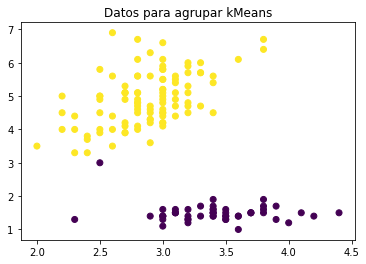

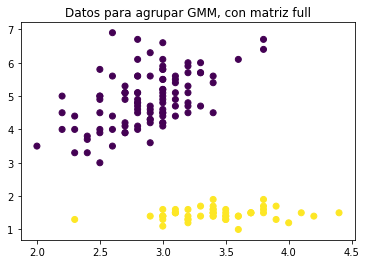

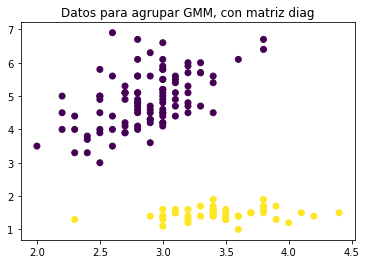

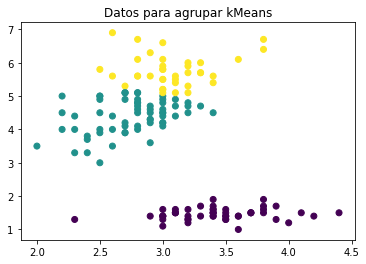

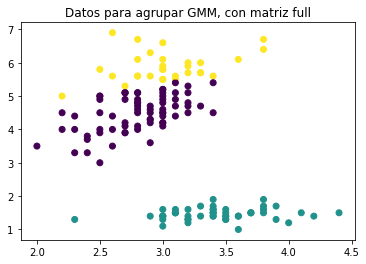

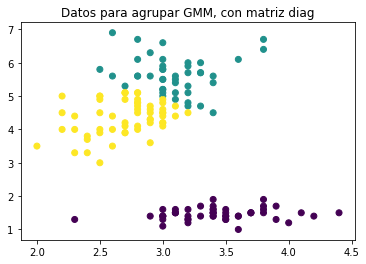

In [62]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
data = load_iris()
X=data.data
Xclustering = X[:,1:3]
vector = [2,3]
matriz = ['full', 'diag']
for i in range(np.size(vector)):
    modelo = KMeans(init='k-means++', n_clusters=vector[i], n_init=1)
    modelo.fit(Xclustering)
    Y = modelo.predict(Xclustering)
    plt.scatter(Xclustering[:,0],Xclustering[:,1], c=Y)
    plt.title("Datos para agrupar kMeans")
    plt.show()

    for j in range(np.size(vector)):
        modelo = GaussianMixture(n_components=vector[i], covariance_type=matriz[j])
        modelo.fit(Xclustering)
        Y = modelo.predict(Xclustering)
        plt.scatter(Xclustering[:,0],Xclustering[:,1], c=Y)
        plt.title("Datos para agrupar GMM, con matriz " + matriz[j])
        plt.show()